In [0]:
import pandas as pd 

In [39]:
data = pd.read_csv('https://raw.githubusercontent.com/RuddiRodriguez/Mechanisms-of-motor/master/Data/full_analysis.csv')
data.dropna(how='all',axis=0)
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('TAC\n', '')
#df = df.replace('\n',' ', regex=True)
data.head()
data.columns

Index(['Sample', 'Attempt', 'Deformation', 'Long', 'Short', 'Mechanism', 'EB',
       'SxIP', 'Kinesin'],
      dtype='object')

In [40]:
names = data.columns
names[1]

'Attempt'

In [41]:
level_map = {"K_pull": 'Sliding', "Sliding_U": 'Sliding',"Sliding":"Sliding","TAC":"TAC","dTAC":"dTAC"}
data['Mechanismf'] = data['Mechanism'].map(level_map)
data

,Sample,Attempt,Deformation,Long,Short,Mechanism,EB,SxIP,Kinesin,Mechanismf
0,1trysamples6\roi1,1,0,0.0,0.0,TAC,0.0,0,30,TAC
1,2,1,0,0.0,0.0,TAC,0.0,0,30,TAC
2,3,1,0,0.0,0.0,TAC,0.0,0,30,TAC
3,4,1,0,0.0,0.0,TAC,0.0,0,30,TAC
4,5,1,0,0.0,0.0,TAC,0.0,0,30,TAC
...,...,...,...,...,...,...,...,...,...,...
367,4,1,1,1.0,0.0,K_pull,200.0,15,7,Sliding
368,5,1,1,1.0,0.0,K_pull,200.0,15,7,Sliding
369,6,4,4,1.0,NaN,TAC,NaN,15,7,TAC
370,7,1,1,1.0,0.0,K_pull,200.0,15,7,Sliding


In [0]:
data['Fraction_successful_tubes'] = data.apply(lambda row: row.Long / 
                                  (row.Attempt ), axis = 1) 

In [44]:
data_gro=data[['Attempt', 'Deformation', 'Long', 'Short', 'Mechanismf',
       'EB', 'SxIP', 'Kinesin']].groupby(['Mechanismf','EB','SxIP','Kinesin'],as_index=True).sum()
data_gro.describe()
data_gro

Attempt  Deformation  Long  Short
Mechanismf EB    SxIP Kinesin                                   
Sliding    0.0   0    30            61           28  27.0    1.0
           200.0 0    15            59           36  36.0    0.0
                      30            26           20  20.0    0.0
                 15   7             38           29  27.0    1.0
                      15            31           28  26.0    0.0
                      30            55           55  55.0    0.0
           220.0 0    15             1            1   1.0    0.0
TAC        0.0   0    30            15            7   7.0    0.0
           200.0 0    15            14           12  12.0    0.0
                      30             8            7   4.0    0.0
                 15   7             45           35  31.0    1.0
                      15            36           29  27.0    2.0
                      30            21           15  15.0    0.0
dTAC       0.0   0    30             8            0   0.0    0.0
           200.0 0    15             1            0   0.0    0.0
                      30             2            0   0.0    0.0
                 15   30             3            3   3.0    0.0

In [45]:
def fraction_tubes(data,column_name,):
    for items in column_name:
        data['FT_'+items] = data [items]/data['Attempt']
        #print (items)
    return data
        
    
    
data_gro=fraction_tubes(data_gro,['Long','Deformation'])
data=fraction_tubes(data,['Long','Deformation'])
#data_gro['Fraction_tubes_TAC'] = data_gro ['TAC']/data_gro.sum(axis=1)
data_gro


Attempt  Deformation  ...   FT_Long  FT_Deformation
Mechanismf EB    SxIP Kinesin                        ...                          
Sliding    0.0   0    30            61           28  ...  0.442623        0.459016
           200.0 0    15            59           36  ...  0.610169        0.610169
                      30            26           20  ...  0.769231        0.769231
                 15   7             38           29  ...  0.710526        0.763158
                      15            31           28  ...  0.838710        0.903226
                      30            55           55  ...  1.000000        1.000000
           220.0 0    15             1            1  ...  1.000000        1.000000
TAC        0.0   0    30            15            7  ...  0.466667        0.466667
           200.0 0    15            14           12  ...  0.857143        0.857143
                      30             8            7  ...  0.500000        0.875000
                 15   7             45           35  ...  0.688889        0.777778
                      15            36           29  ...  0.750000        0.805556
                      30            21           15  ...  0.714286        0.714286
dTAC       0.0   0    30             8            0  ...  0.000000        0.000000
           200.0 0    15             1            0  ...  0.000000        0.000000
                      30             2            0  ...  0.000000        0.000000
                 15   30             3            3  ...  1.000000        1.000000

[17 rows x 6 columns]

<Figure size 360x216 with 0 Axes>

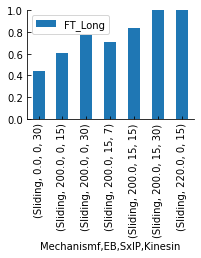

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(5, 3))
#sns.set(style="darkgrid")
#sns.barplot(data_gro[['FT_Long']],alpha=0.9)
#plt.bar(data_gro[['FT_TAC','FT_dTAC','FT_Sliding','FT_Kinesin']])
datat=data_gro.loc[['Sliding']]
datat
ax=datat[['FT_Long']].plot(kind='bar',ylim=(0,1),figsize=(3,2),rot=90,use_index=True,stacked=False,table=False)
#sns.barplot(datat[['FT_Long']],alpha=0.9)
ax.tick_params(left=True,direction='in')
sns.despine()
#plt.savefig('TAC_probability.svg', dpi=300)
#plt.show()

In [0]:
data_gro=data[['Deformation', 'Long', 'Short', 'Mechanism',
       'EB', 'SxIP', 'Kinesin']].groupby(["Kinesin"]).count()
#data_gro.describe()
#data_gro.columns
#def fraction_tubes_t(data,column_name):
 #   for items in column_name:
  #      data_gro['FT_'+items] = data [items]/data.sum(axis=1)
        #print (items)
        
    
    
#fraction_tubes_t(data_gro,['TAC', 'dTAC', 'Sliding', 'Kinesin'])
#data_gro['Fraction_tubes_TAC'] = data_gro ['TAC']/data_gro.sum(axis=1)
data_gro

,Deformation,Long,Short,Mechanism,EB,SxIP
Kinesin,,,,,,
7,62,61,61,62,62,62
15,137,136,136,129,137,137
30,170,170,170,170,170,170


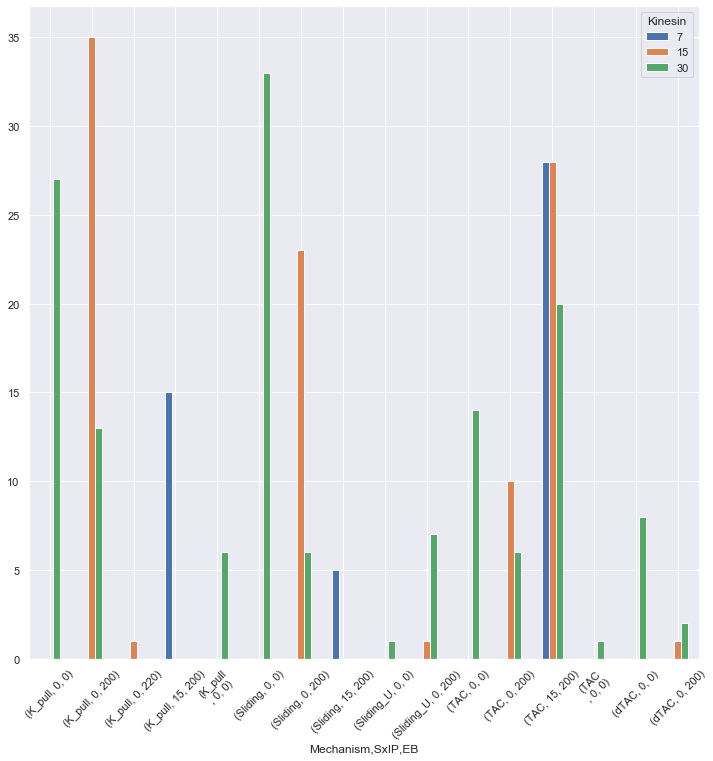

In [0]:
data.head()
#fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Mechanism','SxIP','EB','Kinesin']).count()['FT_Long'].unstack().plot(kind='bar',figsize=(12,12),rot=45,use_index=True,stacked=False,table=False)

In [0]:
datat

Attempt  Deformation  Long  Short   FT_Long  \
Mechanism EB  SxIP Kinesin                                                
TAC       0   0    30          15.0            7   7.0    0.0  0.466667   
          200 0    15          14.0           12  12.0    0.0  0.857143   
                   30           8.0            7   4.0    0.0  0.500000   
              15   7           41.0           30  26.0    4.0  0.634146   
                   15          34.0           29  28.0    1.0  0.823529   
                   30          20.0           14  14.0    0.0  0.700000   

                            FT_Deformation  
Mechanism EB  SxIP Kinesin                  
TAC       0   0    30             0.466667  
          200 0    15             0.857143  
                   30             0.875000  
              15   7              0.731707  
                   15             0.852941  
                   30             0.700000